In [207]:
import pandas as pd 

swf=pd.read_csv("C:\\Users\\SAMSUNG\\Desktop\\시각화 기말 자료\\사회복지시설_20250521214516.csv",encoding='cp949')
swf

,소재지(시군구)별(1),소재지(시군구)별(2),2023,2023.1,2023.2,2023.3,2023.4
0,소재지(시군구)별(1),소재지(시군구)별(2),계,국가,지방자치단체,사회복지법인,비영리법인
1,소재지(시군구)별(1),소재지(시군구)별(2),시설수 (개),시설수 (개),시설수 (개),시설수 (개),시설수 (개)
2,전국,소계,1278,36,958,250,34
3,서울특별시,소계,332,2,278,49,3
4,서울특별시,종로구,5,0,5,0,0
...,...,...,...,...,...,...,...
205,경상남도,합천군,3,0,3,0,0
206,경상남도,하동군,1,0,1,0,0
207,제주특별자치도,소계,4,-,1,3,-
208,제주특별자치도,제주시,2,0,0,2,0


In [208]:
swf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   소재지(시군구)별(1)  210 non-null    object
 1   소재지(시군구)별(2)  210 non-null    object
 2   2023          210 non-null    object
 3   2023.1        210 non-null    object
 4   2023.2        210 non-null    object
 5   2023.3        210 non-null    object
 6   2023.4        210 non-null    object
dtypes: object(7)
memory usage: 11.6+ KB


In [209]:
swf.describe()

,소재지(시군구)별(1),소재지(시군구)별(2),2023,2023.1,2023.2,2023.3,2023.4
count,210,210,210,210,210,210,210
unique,19,172,40,9,34,25,10
top,경기도,소계,1,0,1,0,0
freq,32,18,41,182,42,109,174


In [210]:
swf.columns = ["시도", "시군구", "계", "국가", "지자체", "사회복지법인", "비영리법인"]


swf["행정구역"] = swf["시도"] + " " + swf["시군구"]
swf[["행정구역", "계", "국가", "지자체", "사회복지법인", "비영리법인"]]


,행정구역,계,국가,지자체,사회복지법인,비영리법인
0,소재지(시군구)별(1) 소재지(시군구)별(2),계,국가,지방자치단체,사회복지법인,비영리법인
1,소재지(시군구)별(1) 소재지(시군구)별(2),시설수 (개),시설수 (개),시설수 (개),시설수 (개),시설수 (개)
2,전국 소계,1278,36,958,250,34
3,서울특별시 소계,332,2,278,49,3
4,서울특별시 종로구,5,0,5,0,0
...,...,...,...,...,...,...
205,경상남도 합천군,3,0,3,0,0
206,경상남도 하동군,1,0,1,0,0
207,제주특별자치도 소계,4,-,1,3,-
208,제주특별자치도 제주시,2,0,0,2,0


In [211]:
#

swf["계"] = pd.to_numeric(swf["계"], errors="coerce")
swf.sort_values(by="계", ascending=False)

swf["국가"] = pd.to_numeric(swf["국가"], errors="coerce")
swf.sort_values(by="계", ascending=False)

swf["지자체"] = pd.to_numeric(swf["지자체"], errors="coerce")
swf.sort_values(by="계", ascending=False)

swf["사회복지법인"] = pd.to_numeric(swf["사회복지법인"], errors="coerce")
swf.sort_values(by="계", ascending=False)

swf["비영리법인"] = pd.to_numeric(swf["비영리법인"], errors="coerce")
swf.sort_values(by="계", ascending=False)


cols_to_int = ['계', '국가', '지자체', '사회복지법인', '비영리법인']

#for col in cols_to_int:
 #   swf[col] = swf[col].astype(int)

swf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   시도      210 non-null    object 
 1   시군구     210 non-null    object 
 2   계       208 non-null    float64
 3   국가      197 non-null    float64
 4   지자체     207 non-null    float64
 5   사회복지법인  206 non-null    float64
 6   비영리법인   200 non-null    float64
 7   행정구역    210 non-null    object 
dtypes: float64(5), object(3)
memory usage: 13.3+ KB


In [212]:
swf.isna().sum()

시도         0
시군구        0
계          2
국가        13
지자체        3
사회복지법인     4
비영리법인     10
행정구역       0
dtype: int64

In [213]:
swf = swf.fillna(0)
swf.isna().sum()

시도        0
시군구       0
계         0
국가        0
지자체       0
사회복지법인    0
비영리법인     0
행정구역      0
dtype: int64

In [214]:
swf = swf.iloc[2:].reset_index(drop=True)


#swf.columns = ["시도", "시군구", "계", "국가", "지자체", "사회복지법인", "비영리법인"]



swf = swf[swf["시군구"] != "소계"].copy()


swf["행정구역"] = swf["시도"] + " " + swf["시군구"]


result_sum = swf[["행정구역", "계"]]
result_nation = swf[["행정구역","국가"]]
result_local_government = swf[["행정구역","지자체"]]
result_swfoundation = swf[["행정구역","사회복지법인"]]
result_non_profit = swf[["행정구역","비영리법인"]]

'''#정수형으로 변환 

result_sum = result_sum.astype(int)
result_nation = result_nation.astype(int)
result_local_government = result_local_government.astype(int)
result_swfoundation = result_swfoundation.astype(int)
result_non_profit = result_non_profit.astype(int)'''


# 결과 확인
print(result_sum.info())
print(result_sum.max())
print(result_nation.max())
print(result_local_government.max())
print(result_swfoundation.max())
print(result_non_profit.max())

<class 'pandas.core.frame.DataFrame'>
Index: 190 entries, 2 to 207
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   행정구역    190 non-null    object 
 1   계       190 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.5+ KB
None
행정구역    충청북도 충주시
계           73.0
dtype: object
행정구역    충청북도 충주시
국가          15.0
dtype: object
행정구역    충청북도 충주시
지자체         73.0
dtype: object
행정구역      충청북도 충주시
사회복지법인        22.0
dtype: object
행정구역     충청북도 충주시
비영리법인         9.0
dtype: object


In [215]:
result_sum_sorted = result_sum.sort_values(by="계")
result_sum_sorted

,행정구역,계
28,부산광역시 중구,1.0
29,부산광역시 서구,1.0
67,광주광역시 북구,1.0
62,인천광역시 강화군,1.0
45,대구광역시 중구,1.0
...,...,...
12,서울특별시 노원구,22.0
83,경기도 수원시,24.0
88,경기도 안산시,36.0
91,경기도 화성시,42.0


In [216]:
result_nation_sorted = result_nation.sort_values(by="국가")
result_nation_sorted

,행정구역,국가
2,서울특별시 종로구,0.0
3,서울특별시 중구,0.0
4,서울특별시 용산구,0.0
5,서울특별시 성동구,0.0
6,서울특별시 광진구,0.0
...,...,...
147,전라북도 전주시,1.0
86,경기도 용인시,2.0
51,대구광역시 달성군,2.0
94,경기도 시흥시,13.0


In [217]:
result_local_government_sorted = result_local_government.sort_values(by="지자체")
result_local_government_sorted

,행정구역,지자체
13,서울특별시 은평구,0.0
34,부산광역시 남구,0.0
29,부산광역시 서구,0.0
24,서울특별시 강남구,0.0
41,부산광역시 수영구,0.0
...,...,...
83,경기도 수원시,22.0
93,경기도 의정부시,22.0
88,경기도 안산시,34.0
91,경기도 화성시,40.0


In [218]:
result_swfoundation_sorted=result_swfoundation.sort_values(by="사회복지법인")
result_swfoundation_sorted

,행정구역,사회복지법인
2,서울특별시 종로구,0.0
4,서울특별시 용산구,0.0
5,서울특별시 성동구,0.0
6,서울특별시 광진구,0.0
8,서울특별시 중랑구,0.0
...,...,...
194,경상남도 양산시,9.0
61,인천광역시 서구,10.0
84,경기도 성남시,13.0
92,경기도 평택시,15.0


In [219]:
result_non_profit_sorted = result_non_profit.sort_values(by="비영리법인")
result_non_profit_sorted

,행정구역,비영리법인
2,서울특별시 종로구,0.0
3,서울특별시 중구,0.0
4,서울특별시 용산구,0.0
5,서울특별시 성동구,0.0
6,서울특별시 광진구,0.0
...,...,...
112,경기도 가평군,2.0
57,인천광역시 연수구,3.0
130,충청북도 청주시,3.0
107,경기도 하남시,6.0


### #행정구역별 복지시설 합계(모든 행) ###


In [220]:
!pip install plotly
import plotly.express as px

fig = px.line(
    result_sum_sorted,
    x='행정구역',
    y='계',
    markers=True,
    title="행정구역별 복지시설 합계"
)

# 축 및 스타일 설정
fig.update_layout(
    xaxis_tickangle=-45,
    xaxis_title='행정구역',
    yaxis_title='복지시설 합계',
    height=700,
    width=1000,
    #yaxis=dict(
       # autorange=True  # y축 범위 자동 설정
   # )
)

# 그래프 표시
fig.show()

Defaulting to user installation because normal site-packages is not writeable


### 행정구역별 복지시설 합계(상위 5, 하위5 그룹)

In [221]:
#상위 5

result_sum_sorted_h5=result_sum_sorted.head(5) #상위 10 
result_sum_sorted_t5=result_sum_sorted.tail(5) #하위10 그룹 데이터들 

result_sum_sorted_5=pd.concat([result_sum_sorted_h5,result_sum_sorted_t5])
result_sum_sorted_5

,행정구역,계
28,부산광역시 중구,1.0
29,부산광역시 서구,1.0
67,광주광역시 북구,1.0
62,인천광역시 강화군,1.0
45,대구광역시 중구,1.0
12,서울특별시 노원구,22.0
83,경기도 수원시,24.0
88,경기도 안산시,36.0
91,경기도 화성시,42.0
85,경기도 고양시,73.0


In [222]:
fig = px.line(
    result_sum_sorted_5,
    x='행정구역',
    y='계',
    markers=True,
    title="행정구역별 복지시설 합계 (상, 하 5위)"
)

# 축 및 스타일 설정
fig.update_layout(
    xaxis_tickangle=-45,
    xaxis_title='행정구역',
    yaxis_title='복지시설 합계',
    height=700,
    width=1000,
    #yaxis=dict(
       # autorange=True  # y축 범위 자동 설정
   # )
)

# 그래프 표시
fig.show()

### 행정구역별 복지시설 국가 (모든 행)

In [223]:
fig = px.line(
    result_nation_sorted,
    x='행정구역',
    y='국가',
    markers=True,
    title="행정구역별 복지시설 국가 시설 수"
)

# 축 및 스타일 설정
fig.update_layout(
    xaxis_tickangle=-45,
    xaxis_title='행정구역',
    yaxis_title='국가 시설 수',
    height=700,
    width=1000,
    #yaxis=dict(
       # autorange=True  # y축 범위 자동 설정
   # )
)

# 그래프 표시
fig.show()

### 행정구역별 복지시설 국가 (상, 하 5위)


In [224]:
result_nation_sorted_h5=result_nation_sorted.head(5) #상위 10 
result_nation_sorted_t5=result_nation_sorted.tail(5) #하위10 그룹 데이터들 

result_nation_sorted_5=pd.concat([result_nation_sorted_h5,result_nation_sorted_t5])
result_nation_sorted_5

,행정구역,국가
2,서울특별시 종로구,0.0
3,서울특별시 중구,0.0
4,서울특별시 용산구,0.0
5,서울특별시 성동구,0.0
6,서울특별시 광진구,0.0
147,전라북도 전주시,1.0
86,경기도 용인시,2.0
51,대구광역시 달성군,2.0
94,경기도 시흥시,13.0
81,세종특별자치시 세종특별자치시,15.0


In [225]:
fig = px.line(
    result_nation_sorted_5,
    x='행정구역',
    y='국가',
    markers=True,
    title="행정구역별 복지시설 국가 시설 수(상, 하 5위)"
)

# 축 및 스타일 설정
fig.update_layout(
    xaxis_tickangle=-45,
    xaxis_title='행정구역',
    yaxis_title='국가 시설 수',
    height=700,
    width=1000,
    #yaxis=dict(
       # autorange=True  # y축 범위 자동 설정
   # )
)

# 그래프 표시
fig.show()

### 행정구역별 복지시설 지자체 (모든 행)

In [226]:
fig = px.line(
    result_local_government_sorted,
    x='행정구역',
    y='지자체',
    markers=True,
    title="행정구역별 복지시설 지자체 시설 수"
)

# 축 및 스타일 설정
fig.update_layout(
    xaxis_tickangle=-45,
    xaxis_title='행정구역',
    yaxis_title='지자체 시설 수',
    height=700,
    width=1000,
    #yaxis=dict(
       # autorange=True  # y축 범위 자동 설정
   # )
)

# 그래프 표시
fig.show()

### 행정구역 별 복지시설 지자체 (상, 하 5위)

In [227]:
result_local_government_sorted_h5=result_local_government_sorted.head(5) #상위 10 
result_local_government_sorted_t5=result_local_government_sorted.tail(5) #하위10 그룹 데이터들 

result_local_government_sorted_5=pd.concat([result_local_government_sorted_h5,result_local_government_sorted_t5])
result_local_government_sorted_5

,행정구역,지자체
13,서울특별시 은평구,0.0
34,부산광역시 남구,0.0
29,부산광역시 서구,0.0
24,서울특별시 강남구,0.0
41,부산광역시 수영구,0.0
83,경기도 수원시,22.0
93,경기도 의정부시,22.0
88,경기도 안산시,34.0
91,경기도 화성시,40.0
85,경기도 고양시,73.0


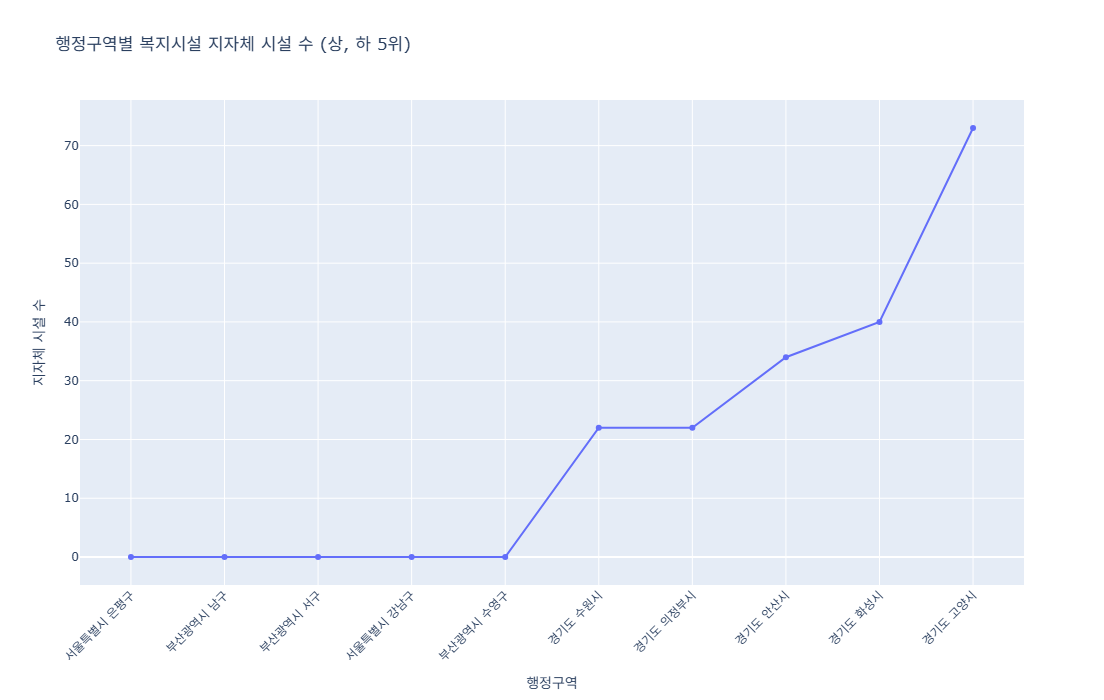

In [228]:
fig = px.line(
    result_local_government_sorted_5,
    x='행정구역',
    y='지자체',
    markers=True,
    title="행정구역별 복지시설 지자체 시설 수 (상, 하 5위)"
)

# 축 및 스타일 설정
fig.update_layout(
    xaxis_tickangle=-45,
    xaxis_title='행정구역',
    yaxis_title='지자체 시설 수',
    height=700,
    width=1000,
    #yaxis=dict(
       # autorange=True  # y축 범위 자동 설정
   # )
)

# 그래프 표시
fig.show()

### 행정구역 별 복지시설 사회복지법인 시설 수 (모든 행)

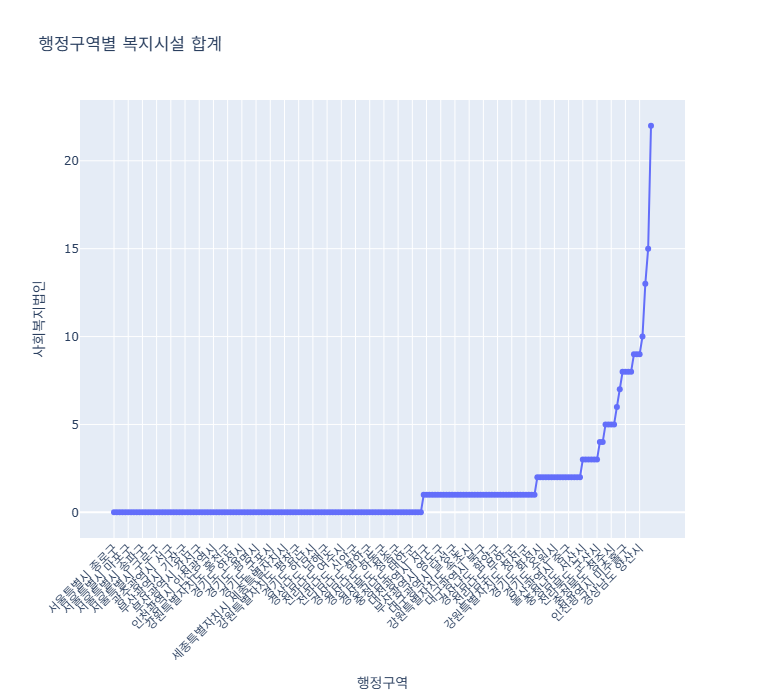

In [230]:
import plotly.express as px

fig = px.line(
    result_swfoundation_sorted,
    x='행정구역',
    y='사회복지법인',
    markers=True,
    title="행정구역별 사회복지법인 복지시설 수"
)

# 축 및 스타일 설정
fig.update_layout(
    xaxis_tickangle=-45,
    xaxis_title='행정구역',
    yaxis_title='사회복지법인 시설 수',
    height=700,
    width=1000,
    #yaxis=dict(
       # autorange=True  # y축 범위 자동 설정
   # )
)

# 그래프 표시
fig.show()

In [231]:
result_swfoundation_sorted_h5=result_swfoundation_sorted.head(5) #상위 10 
result_swfoundation_sorted_t5=result_swfoundation_sorted.tail(5) #하위10 그룹 데이터들 

result_swfoundation_sorted_5=pd.concat([result_swfoundation_sorted_h5,result_swfoundation_sorted_t5])
result_swfoundation_sorted_5

,행정구역,사회복지법인
2,서울특별시 종로구,0.0
4,서울특별시 용산구,0.0
5,서울특별시 성동구,0.0
6,서울특별시 광진구,0.0
8,서울특별시 중랑구,0.0
194,경상남도 양산시,9.0
61,인천광역시 서구,10.0
84,경기도 성남시,13.0
92,경기도 평택시,15.0
13,서울특별시 은평구,22.0


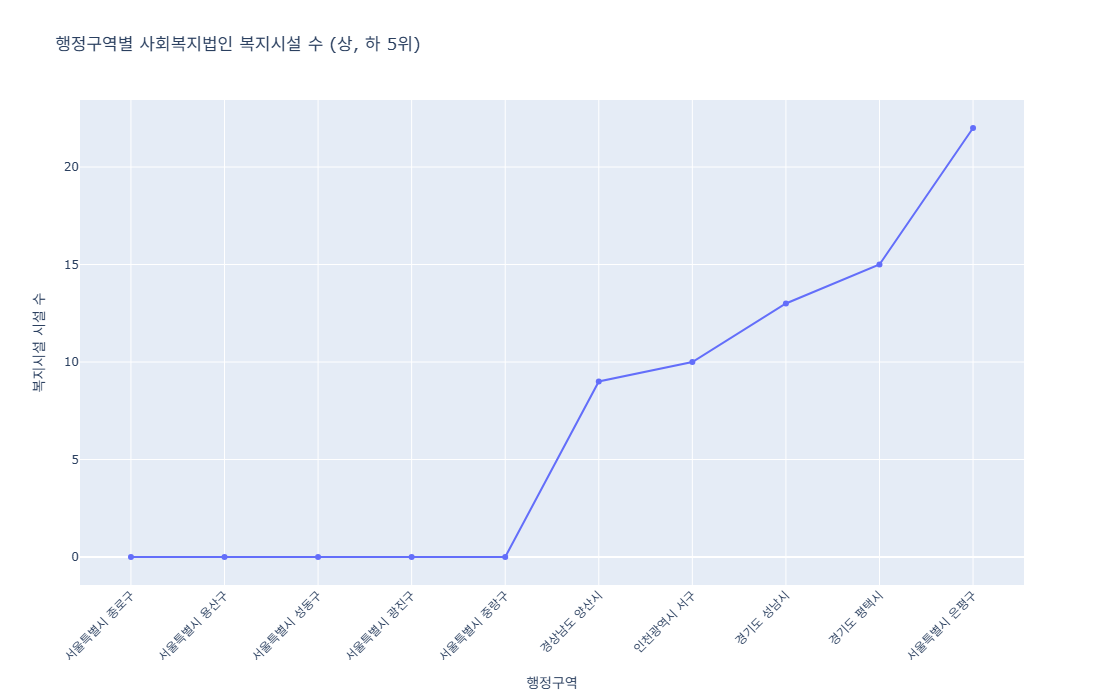

In [233]:
fig = px.line(
    result_swfoundation_sorted_5,
    x='행정구역',
    y='사회복지법인',
    markers=True,
    title="행정구역별 사회복지법인 복지시설 수 (상, 하 5위)"
)

# 축 및 스타일 설정
fig.update_layout(
    xaxis_tickangle=-45,
    xaxis_title='행정구역',
    yaxis_title='사회복지법인 시설 수',
    height=700,
    width=1000,
    #yaxis=dict(
       # autorange=True  # y축 범위 자동 설정
   # )
)

# 그래프 표시
fig.show()

### 행정구역 별 비영리법인 복지시설 수 (모든 행)

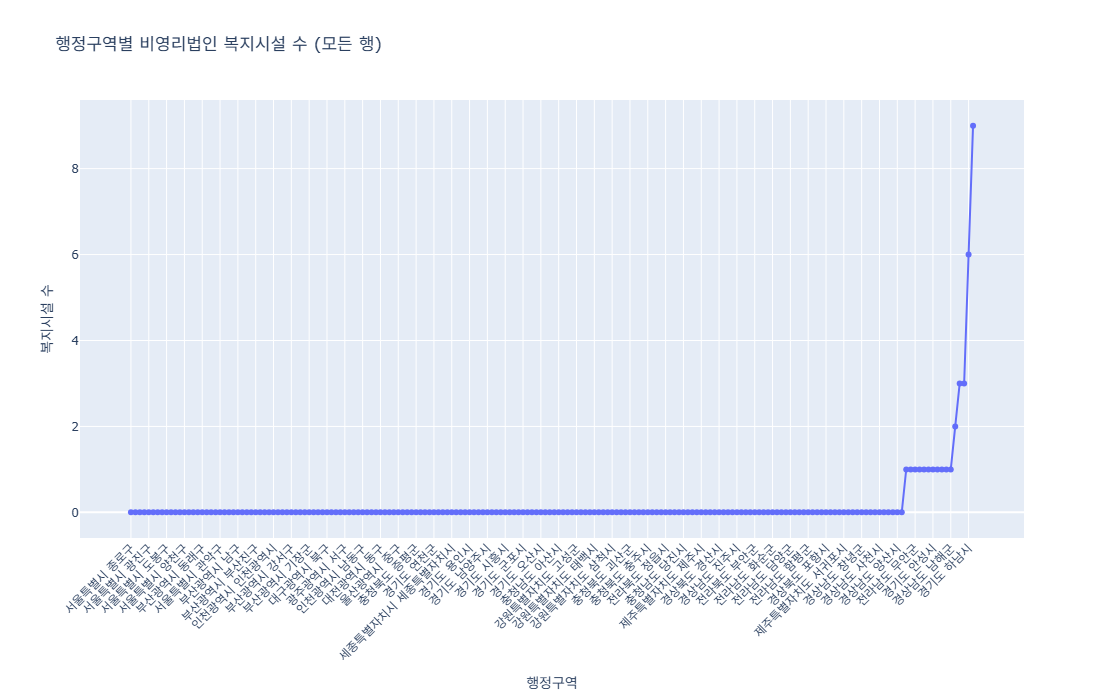

In [237]:
import plotly.express as px

fig = px.line(
    result_non_profit_sorted,
    x='행정구역',
    y='비영리법인',
    markers=True,
    title="행정구역별 비영리법인 복지시설 수"
)

# 축 및 스타일 설정
fig.update_layout(
    xaxis_tickangle=-45,
    xaxis_title='행정구역',
    yaxis_title='비영리법인 시설 수',
    height=700,
    width=1000,
    #yaxis=dict(
       # autorange=True  # y축 범위 자동 설정
   # )
)

# 그래프 표시
fig.show()

### 행정구역별 비영리 법인 복지시설 수 (상, 하 5위)

In [238]:
result_non_profit_sorted_h5=result_non_profit_sorted.head(5) #상위 10 
result_non_profit_sorted_t5=result_non_profit_sorted.tail(5) #하위10 그룹 데이터들 

result_non_profit_sorted_5=pd.concat([result_non_profit_sorted_h5,result_non_profit_sorted_t5])
result_non_profit_sorted_5

,행정구역,비영리법인
2,서울특별시 종로구,0.0
3,서울특별시 중구,0.0
4,서울특별시 용산구,0.0
5,서울특별시 성동구,0.0
6,서울특별시 광진구,0.0
112,경기도 가평군,2.0
57,인천광역시 연수구,3.0
130,충청북도 청주시,3.0
107,경기도 하남시,6.0
179,경상북도 구미시,9.0


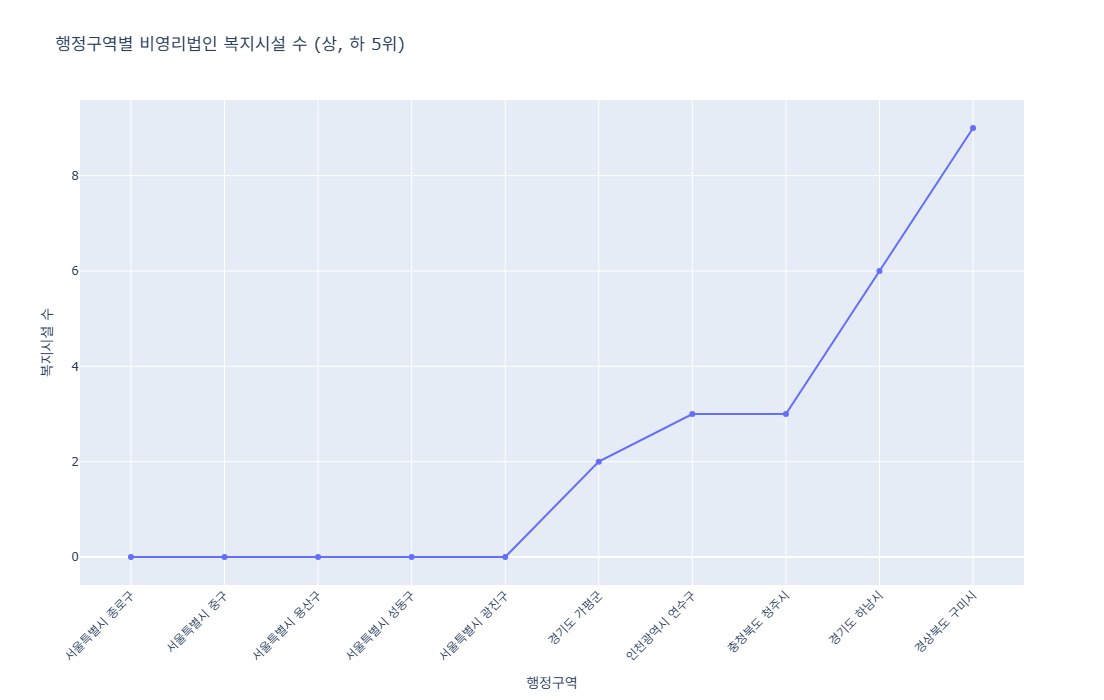

In [239]:
fig = px.line(
    result_non_profit_sorted_5,
    x='행정구역',
    y='비영리법인',
    markers=True,
    title="행정구역별 비영리법인 복지시설 수 (상, 하 5위)"
)

# 축 및 스타일 설정
fig.update_layout(
    xaxis_tickangle=-45,
    xaxis_title='행정구역',
    yaxis_title='비영리법인 시설 수',
    height=700,
    width=1000,
    #yaxis=dict(
       # autorange=True  # y축 범위 자동 설정
   # )
)

# 그래프 표시
fig.show()